In [25]:
import numpy as np
dataset = np.genfromtxt('cardio_train.csv', delimiter=";", skip_header=1, usecols=range(1, 13))

In [26]:
print(dataset.shape)

(70000, 12)


In [27]:
np.set_printoptions(formatter={'float':lambda x: "{0:0.2f}".format(x)})
print(dataset[0:5, :])

[[18393.00 2.00 168.00 62.00 110.00 80.00 1.00 1.00 0.00 0.00 1.00 0.00]
 [20228.00 1.00 156.00 85.00 140.00 90.00 3.00 1.00 0.00 0.00 1.00 1.00]
 [18857.00 1.00 165.00 64.00 130.00 70.00 3.00 1.00 0.00 0.00 0.00 1.00]
 [17623.00 2.00 169.00 82.00 150.00 100.00 1.00 1.00 0.00 0.00 1.00 1.00]
 [17474.00 1.00 156.00 56.00 100.00 60.00 1.00 1.00 0.00 0.00 0.00 0.00]]


In [30]:
import random
np.random.shuffle(dataset)

In [31]:
index_20persent = int(0.2 * len(dataset[:, 0]))
print(index_20persent)

14000


In [32]:
xval = dataset[:index_20persent, :-1]
yval = dataset[:index_20persent, -1]

xtrain = dataset[index_20persent:, 0:-1]
ytrain = dataset[index_20persent:, -1]

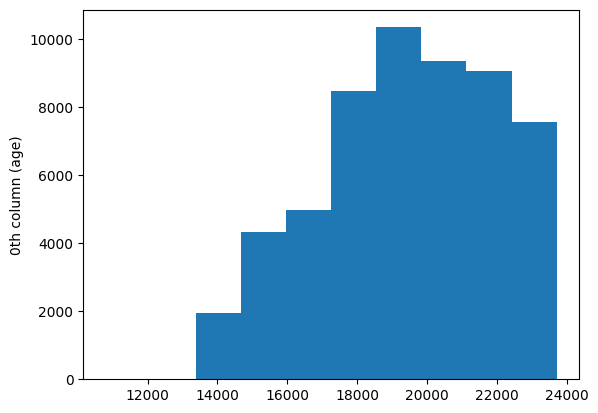

In [33]:
import matplotlib.pyplot as plt

plt.hist(xtrain[:,0])
plt.ylabel('0th column (age)')
plt.show()

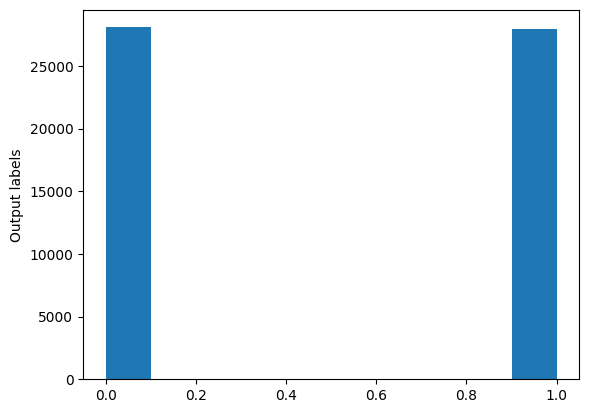

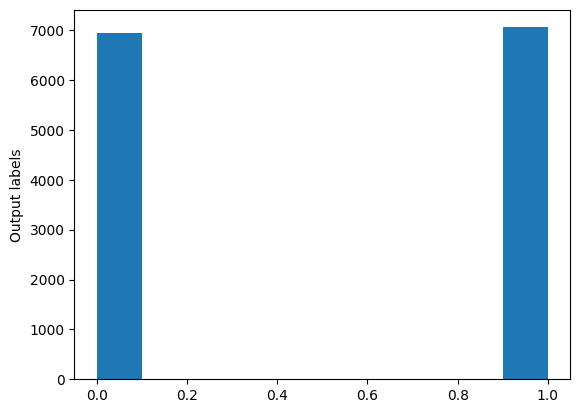

In [34]:
plt.hist(ytrain)
plt.ylabel('Output labels')
plt.show()

plt.hist(yval)
plt.ylabel('Output labels')
plt.show()

In [35]:
mean = xtrain.mean(axis=0)
xtrain -= mean
std = xtrain.std(axis=0)
xtrain /= std

xval -= mean
xval /= std

In [36]:
print(mean)
print(std)

[19464.34 1.35 164.37 74.22 128.71 96.96 1.36 1.22 0.09 0.05 0.80]
[2466.88 0.48 8.24 14.44 150.19 194.94 0.68 0.57 0.28 0.22 0.40]


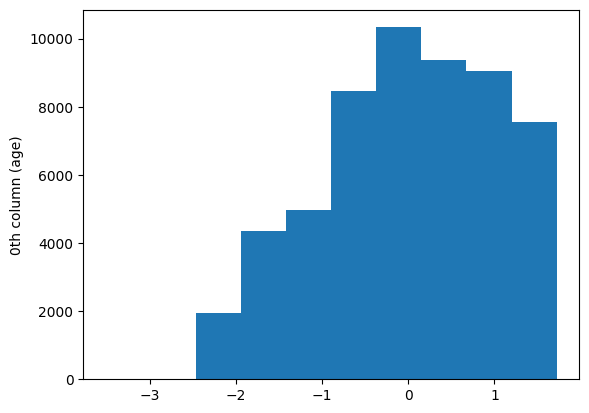

In [37]:
plt.hist(xtrain[:,0])
plt.ylabel('0th column (age)')
plt.show()

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xval.shape)
print(yval.shape)
print(xtrain[0:3,])
print(ytrain[0:3])
print(xval[0:3,])
print(yval[0:3])

Create Nural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim = len(xtrain[0,:]), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary)

Compile the model

In [40]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Train the model

In [42]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [43]:
history = model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=256, batch_size=10, callbacks = (callback_a, callback_b))

Epoch 1/256
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6280 - loss: 0.6459 - val_accuracy: 0.7201 - val_loss: 0.5886
Epoch 2/256
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7214 - loss: 0.5857 - val_accuracy: 0.7328 - val_loss: 0.5723
Epoch 3/256
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7278 - loss: 0.5741 - val_accuracy: 0.7326 - val_loss: 0.5717
Epoch 4/256
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7327 - loss: 0.5583 - val_accuracy: 0.7334 - val_loss: 0.5647
Epoch 5/256
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7279 - loss: 0.5570 - val_accuracy: 0.7332 - val_loss: 0.5602
Epoch 6/256
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7353 - loss: 0.5504 - val_accuracy: 0.7338 - val_loss: 0.5638
Epoch 7/256
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7351 - loss: 0.5568 - val_accuracy: 0.7344 - val_loss: 0.5649
Epoch 8/256
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7346 -

In [44]:
print(history.params)

{'verbose': 'auto', 'epochs': 256, 'steps': 5600}


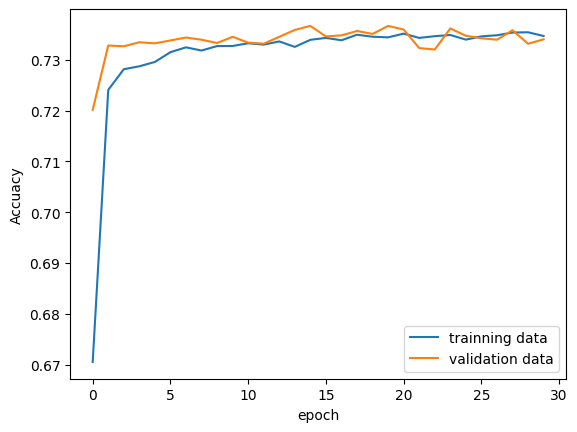

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuacy')
plt.xlabel('epoch')
plt.legend(['trainning data', 'validation data'], loc='lower right')
plt.show()

In [49]:
model.load_weights('my_best_model.weights.h5')

Evaluate the model on training data

In [50]:
scores =model.evaluate(xtrain, ytrain)  ## training data
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7330 - loss: 0.5516
['loss', 'compile_metrics']
[0.552274227142334, 0.7341964244842529]

compile_metrics: 73.42%


In [51]:
scores =model.evaluate(xval, yval)  ## test data
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7351 - loss: 0.5466

compile_metrics: 73.45%


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


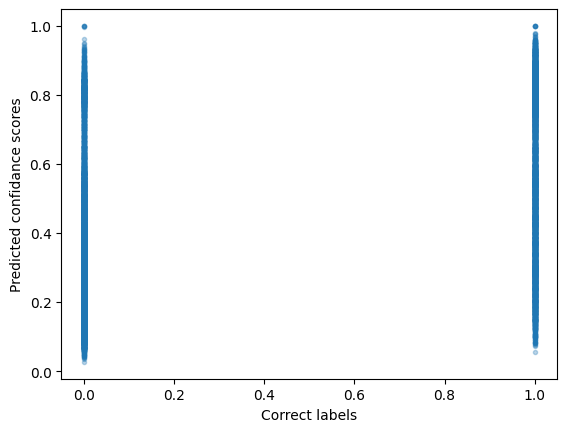

In [52]:
prediction = model.predict(xval)
plt.plot(yval, prediction, '.', alpha = 0.3)
plt.xlabel('Correct labels')
plt.ylabel('Predicted confidance scores')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(yval, prediction.round())
precision = precision_score(yval, prediction.round())
recall = recall_score(yval, prediction.round())
f1score = f1_score(yval, prediction.round())
print("Accuracy: %.2f" % (accuracy*100.0))
print("Precision: %.2f" % (precision*100.0))
print("Recall: %.2f" % (recall*100.0))
print("f1-score: %.2f" % (f1score))

Accuracy: 73.45
Precision: 75.38
Recall: 70.30
f1-score: 0.73
